# Data Exploratory Analysis

To begin with, some modules you might want to install.

In [ ]:
pip install wordcloud

In [ ]:
pip install pywaffle

## Summary

* [Imports](#chapter1)
* [Most common words between artists](#chapter2)
* [First visualization](#chapter3)
* [Sentiment analysis](#chapter4)


For this part of the project we chose to focus on the following artists: Adele, Bruno Mars, Drake, Eminem, Kanye West and Lana Del Rey. All of those artists were deemed to have suficient lyrics put out into the world for us to try and work with. Even though some of them have a number of albums higher then others, we thought it would be interesting to see if that leads to any disparities.

## Imports <a class="anchor" id="chapter1"></a>

In [29]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import collections

from pathlib import Path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm
from sklearn.feature_extraction import text
from nltk.tokenize import word_tokenize
from collections import Counter
from pywaffle import Waffle


if not "root" in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()
os.chdir(root)

## Most common words between artists  <a class="anchor" id="chapter2"></a>

To begin our data exploration we will be looking into the words that are most used by our artists. Let's see what words are the most used by Emninem for instance.

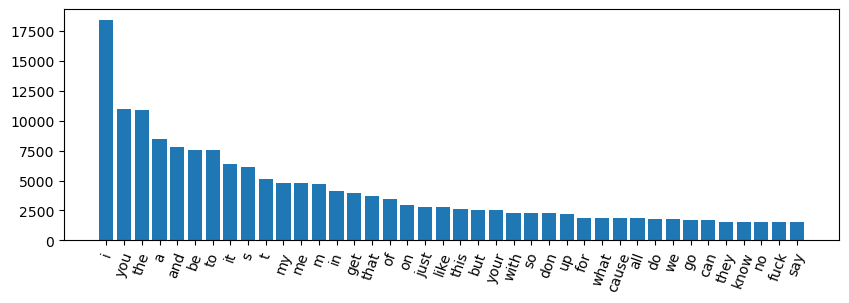

In [67]:
from functions import *

df_eminem=pd.read_csv('artist_data/discography_Eminem')

#joining all of his lyrics from all of his albums into one big text 
text_eminem= " ".join( str(lyrics) for lyrics in df_eminem['Clean Lyrics'])  

#tokenizing said lyrics
d= dict_freq_words(tokenized_lyrics(text_eminem))

#chosing the top 40 most used words 
top40= list(d.items())[:40]

plt.rcParams['figure.figsize'] = [10, 3]
plt.bar(range(len(top40)), [val[1] for val in top40], align='center')
plt.xticks(range(len(top40)), [val[0] for val in top40])
plt.xticks(rotation=70)
plt.show()

Here we can see that most of these words are not even words and do not help us much to comprehend the data. The fact that Eminem uses the word 'I' a lot would not help use see what could differentiate his vocabulary for say Drake or Adele. Let us see if some of the words most used by Eminem also belong to the set of the most used words by other artists. 

In [38]:
# Our list of most used words 
words = []


for filename in os.listdir('artist_data'):
    data = pd.read_csv(f'artist_data/{filename}')
    text= " ".join( str(lyrics) for lyrics in data['Clean Lyrics'])  
    d= dict_freq_words(tokenized_lyrics(text))
    
    #this time let us look at the top 20 most used words by an artist 
    top20= list(d.items())[:20]
    
    top = [word for (word, count) in top20]
    for t in top:
        words.append(t)

In [39]:
Counter(words).most_common()

[('i', 6),
 ('you', 6),
 ('be', 6),
 ('it', 6),
 ('the', 6),
 ('me', 6),
 ('t', 6),
 ('to', 6),
 ('and', 6),
 ('my', 6),
 ('a', 6),
 ('that', 6),
 ('s', 6),
 ('in', 5),
 ('m', 5),
 ('get', 5),
 ('like', 5),
 ('on', 4),
 ('of', 3),
 ('for', 3),
 ('know', 2),
 ('all', 2),
 ('your', 1),
 ('love', 1),
 ('but', 1),
 ('yeah', 1),
 ('what', 1),
 ('oh', 1),
 ('just', 1),
 ('we', 1)]

Now for each word we can see hom many out of our 6 artist have said word in their top 20. For instance, it seemin that only one artist has the word 'yeah' in his top 20 so that might give us information about said artist. But all 6 singers have 'that' as a top word so that would word would not help us differenciate them. Let's say that if at least 3 of our singers have a word in their top word list then we remove it.

#### Let us remove some stop words

In [43]:
from sklearn.feature_extraction import text

#at least 3 of our singers have a word in their top word list
mots= [word for word, count in Counter(words).most_common() if count > 2]+['ve', 'ain', 'ma', 'd', 'URLCopyEmbedCopy', 'em', 'wan', 'na', 'gon', 'bout', 'u','ah','oh','ooh','ya','ll', 'don','cause']

#adding our stop words to already known english stop words
top_words = text.ENGLISH_STOP_WORDS.union(mots)

We now have a new list of top words that should help us visualize our data. Let's look at a first wordcloud.

## First visualization <a class="anchor" id="chapter3"></a>

### Drake Wordcloud

In [46]:
df_drake=pd.read_csv('artist_data/discography_Drake')

text_drake  = " ".join(lyrics for lyrics in df_drake['Clean Lyrics'][:216])

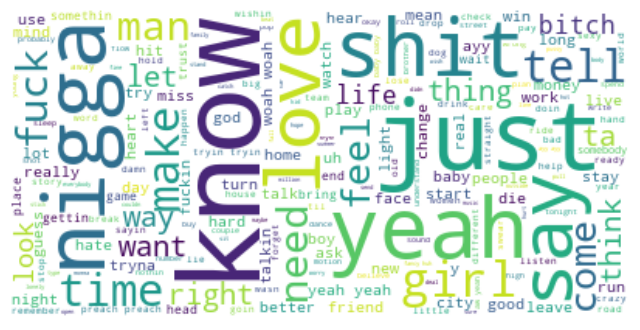

In [62]:
#adding our stop words into the wordcloud 
wordcloud = WordCloud(stopwords=top_words,  background_color="white").generate(text_drake)

plt.rcParams['figure.figsize'] = [8, 6]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The words that pop out the most are 'know', 'shit', 'yeah' and 'love'. 

### Wordcloud comparaison 

In [2]:
artist_names = ["Adele","Bruno Mars", "Drake","Eminem", "Kanye West","Lana Del Rey"]

In [133]:
wc = WordCloud(stopwords=top_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

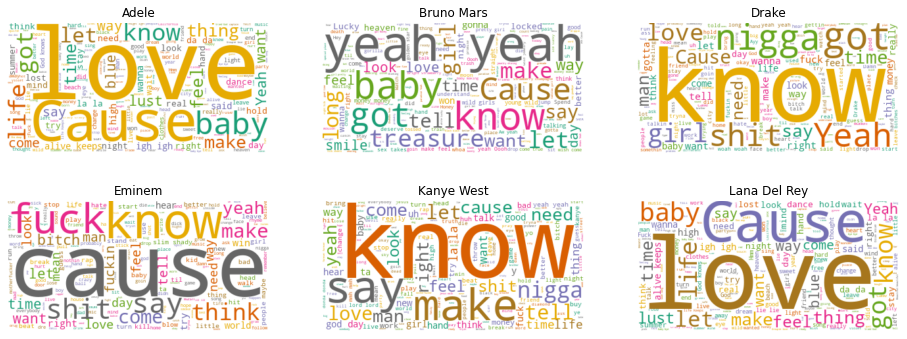

In [134]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 6]

artist_names = ["Adele","Bruno Mars", "Drake","Eminem", "Kanye West","Lana Del Rey"]

# Create subplots for each comedian
    
index=0 

for filename in os.listdir('C:/Maria/2A/ProjetPython2A/completed_data'):
    data = pd.read_csv(f'C:/Maria/2A/ProjetPython2A/completed_data/{filename}')
    text= " ".join( str(lyrics) for lyrics in data['Clean Lyrics'])    
    wc.generate(text)
    
    plt.subplot(2, 3, index +1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(artist_names[index])
    if index < len(artist_names)-1:
        index+=1 
        
plt.show()
    

Some singers tend to use more profanity than others. 

### Amout of words

In [152]:
dict_love = {}
dict_f = {}
dict_s = {}
index=0 
for filename in os.listdir('C:/Maria/2A/ProjetPython2A/completed_data'):
    data = pd.read_csv(f'C:/Maria/2A/ProjetPython2A/completed_data/{filename}')
    text= " ".join( str(lyrics) for lyrics in data['Clean Lyrics'])  

    d= dict_freq_words(tokenized_lyrics(text))
 
    dict_love[artist_names[index]]= d['love']
    dict_f[artist_names[index]]= d['fuck']
    dict_s[artist_names[index]]= d['shit']
    if index < len(artist_names)-1:
        index+=1 
    
        
dict_f

{'Adele': 3,
 'Bruno Mars': 1,
 'Drake': 247,
 'Eminem': 1539,
 'Kanye West': 282,
 'Lana Del Rey': 3}

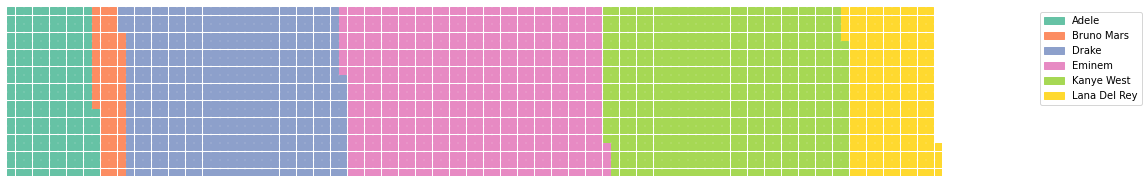

In [155]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20, 
    values=dict_love, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

Might be due to the number of albums of each artist.

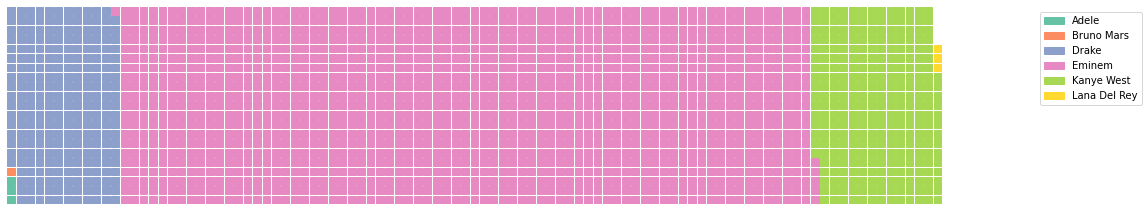

In [161]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=21, 
    values=dict_f, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

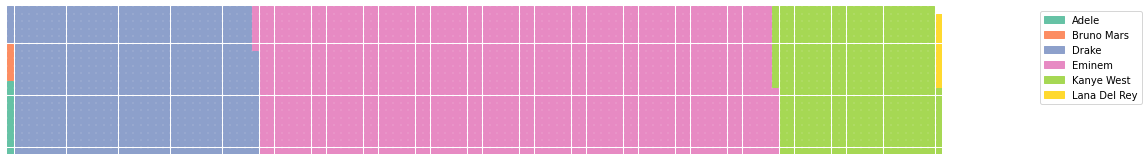

In [162]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20, 
    values=dict_s, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

Clearly Eminem swears the most followed by Drake and Kanye West.

## Sentiment analysis <a class="anchor" id="chapter4"></a>

In [2]:
pip install textblob

In [8]:
from textblob import TextBlob

TextBlob finds all of the words and phrases that it can assign a polarity and subjectivity to, and averages all of them together.

In [51]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

d = {'Lyrics': [], 'Artist':artist_names}  

for filename in os.listdir('C:/Maria/2A/ProjetPython2A/artist_data'):
    data = pd.read_csv(f'C:/Maria/2A/ProjetPython2A/artist_data/{filename}')
    text= " ".join( str(lyrics) for lyrics in data['Clean Lyrics'])  
    d['Lyrics'].append(text)
    
df=pd.DataFrame(d)

    
df['polarity'] = df['Lyrics'].apply(pol)
df['subjectivity'] = df['Lyrics'].apply(sub)

df

,Lyrics,Artist,polarity,subjectivity
0,i ll be take flower to the cemetery of my hear...,Adele,0.134245,0.529070
1,hey hey hey i get a condo in manhattan baby gi...,Bruno Mars,0.173244,0.468357
2,i love you i love you i love you until i until...,Drake,0.074037,0.492698
3,thus far this album ha provide musical accompa...,Eminem,-0.022028,0.503660
4,lyric from drink champ snippet if i let go i g...,Kanye West,0.077574,0.491994
5,i remember you well in the chelsea hotel you b...,Lana Del Rey,0.101734,0.520259


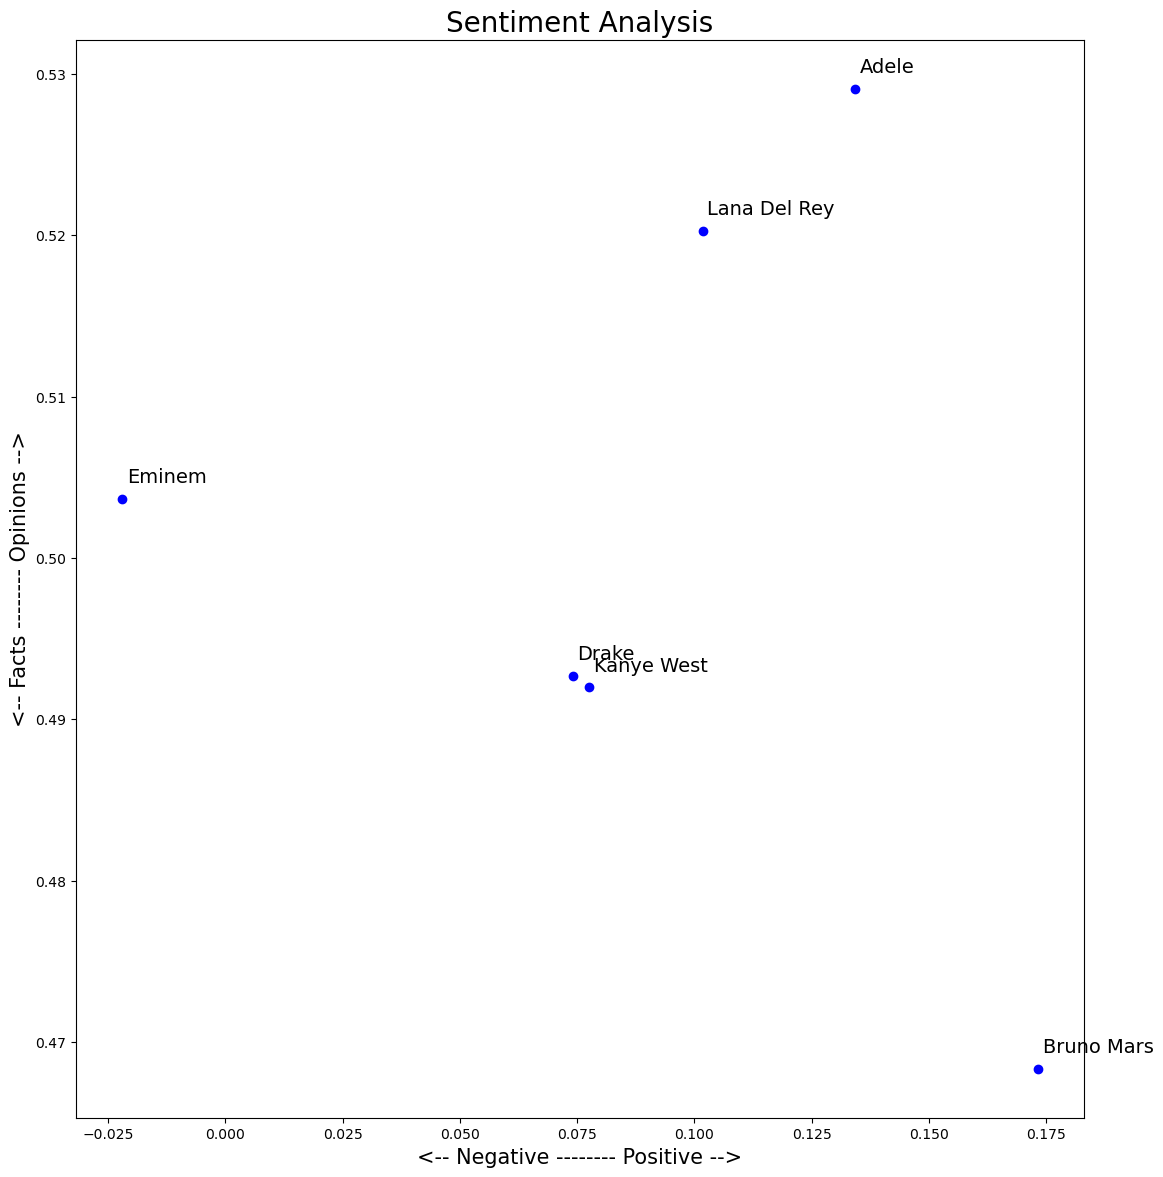

In [60]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 14]

for index, artist in enumerate(df.index):
    x = df.polarity.loc[artist]
    y = df.subjectivity.loc[artist]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df['Artist'][index], fontsize=14)
    
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Over time 

Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). \ A corpus' sentiment is the average of these.
Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

Kayne West and Drake are very close. 